In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data Pre_processing

In [3]:
df.shape

(14999, 10)

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
unique_values=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary']].nunique()
print(unique_values)

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64


In [9]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

# Exploratory analysis

0    11428
1     3571
Name: left, dtype: int64


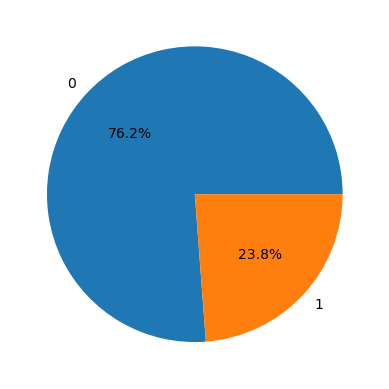

In [10]:
left_counts = df['left'].value_counts()
print(left_counts)
plt.pie(left_counts, labels=left_counts.index, autopct='%1.1f%%')
plt.show()

   salary  left  count
0    high     0   1155
1    high     1     82
2     low     0   5144
3     low     1   2172
4  medium     0   5129
5  medium     1   1317


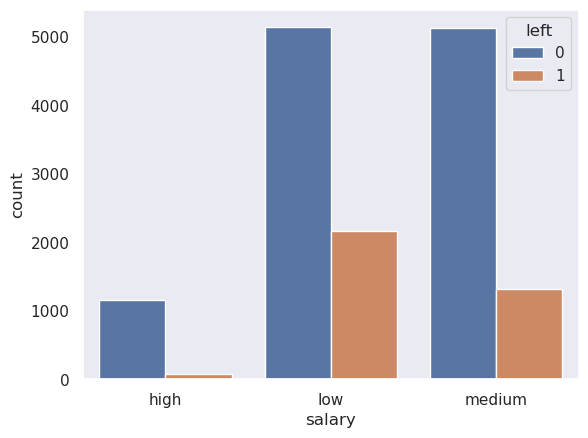

In [11]:
salary_impact = df.groupby(['salary', 'left']).size().reset_index(name='count')

print(salary_impact)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='dark')
sns.barplot(x='salary', y='count',hue='left', data=salary_impact)

plt.show()

     Department  left  count
0            IT     0    954
1            IT     1    273
2         RandD     0    666
3         RandD     1    121
4    accounting     0    563
5    accounting     1    204
6            hr     0    524
7            hr     1    215
8    management     0    539
9    management     1     91
10    marketing     0    655
11    marketing     1    203
12  product_mng     0    704
13  product_mng     1    198
14        sales     0   3126
15        sales     1   1014
16      support     0   1674
17      support     1    555
18    technical     0   2023
19    technical     1    697


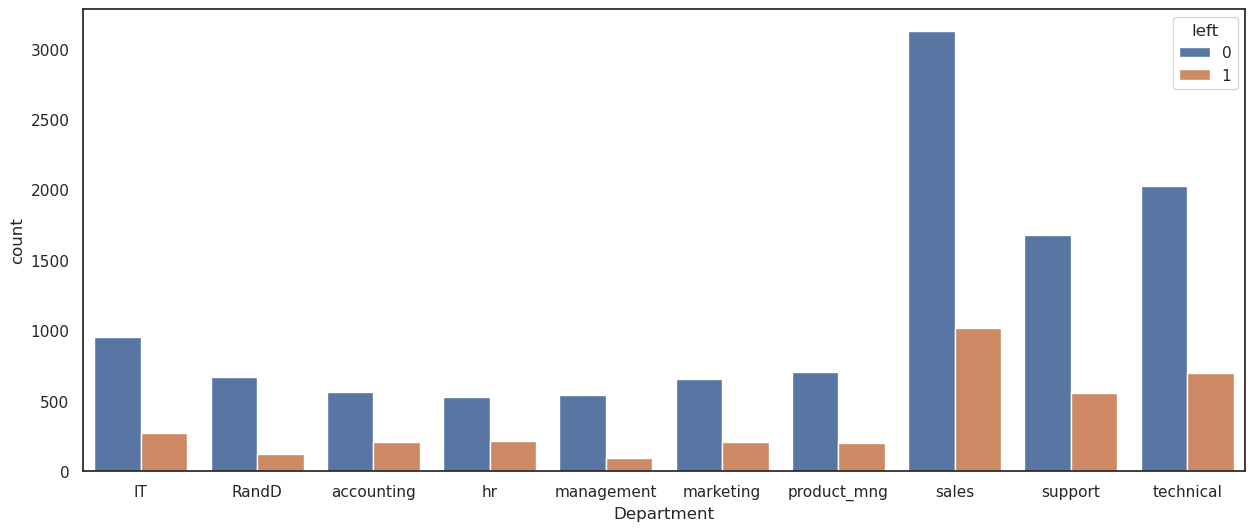

In [12]:
department = df.groupby(['Department', 'left']).size().reset_index(name='count')

print(department)

sns.set(style='white')
sns.barplot(x='Department', y='count',hue='left', data=department)
plt.gcf().set_size_inches(15, 6)
plt.show() #which department has the highest employees leaving or not leaving

   promotion_last_5years  left  count
0                      0     0  11128
1                      0     1   3552
2                      1     0    300
3                      1     1     19


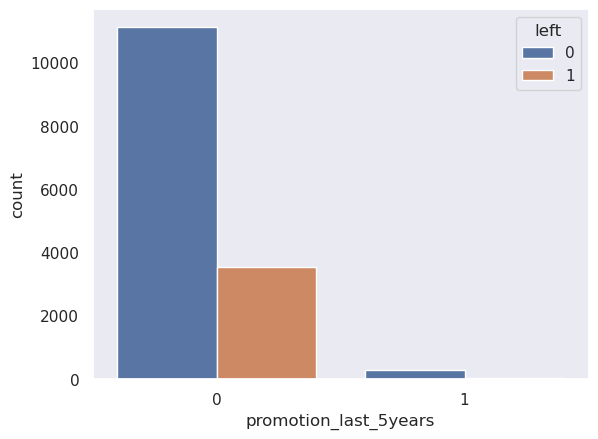

In [13]:
promotion_impact = df.groupby(['promotion_last_5years', 'left']).size().reset_index(name='count')

print(promotion_impact)
sns.set(style='dark')
sns.barplot(x='promotion_last_5years', y='count',hue='left', data=promotion_impact)
plt.show() #does promotion have an impact to employees leaving



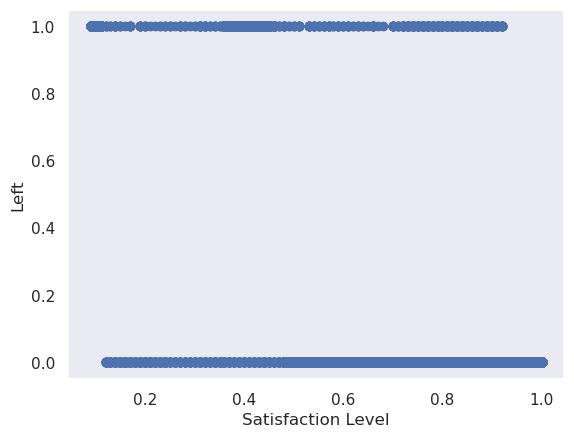

In [14]:
plt.scatter(df['satisfaction_level'], df['left'])
plt.xlabel('Satisfaction Level')
plt.ylabel('Left')
plt.show()

# Encoding of Categorical Features(One hot encoder)

In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first').set_output(transform="pandas")
cat_encoded = encoder.fit_transform(df[['salary','Department']])
cat_encoded #encoding categorical variable which is salary and Department and dropping the first dummy to avoid dummy trap

,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14994,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
hr = pd.concat([df, cat_encoded], axis=1)
hr #merging the encoded variables to the dataframe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,0.37,0.48,2,160,3,0,1,0,support,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,0.37,0.53,2,143,3,0,1,0,support,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,0.11,0.96,6,280,4,0,1,0,support,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
hr.drop(['salary', 'Department'], axis=1, inplace=True)
hr #dropping the original categorical variables

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,0.37,0.48,2,160,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,0.37,0.53,2,143,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,0.11,0.96,6,280,4,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary_low', 'salary_medium',
       'Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical'],
      dtype='object')

<Axes: >

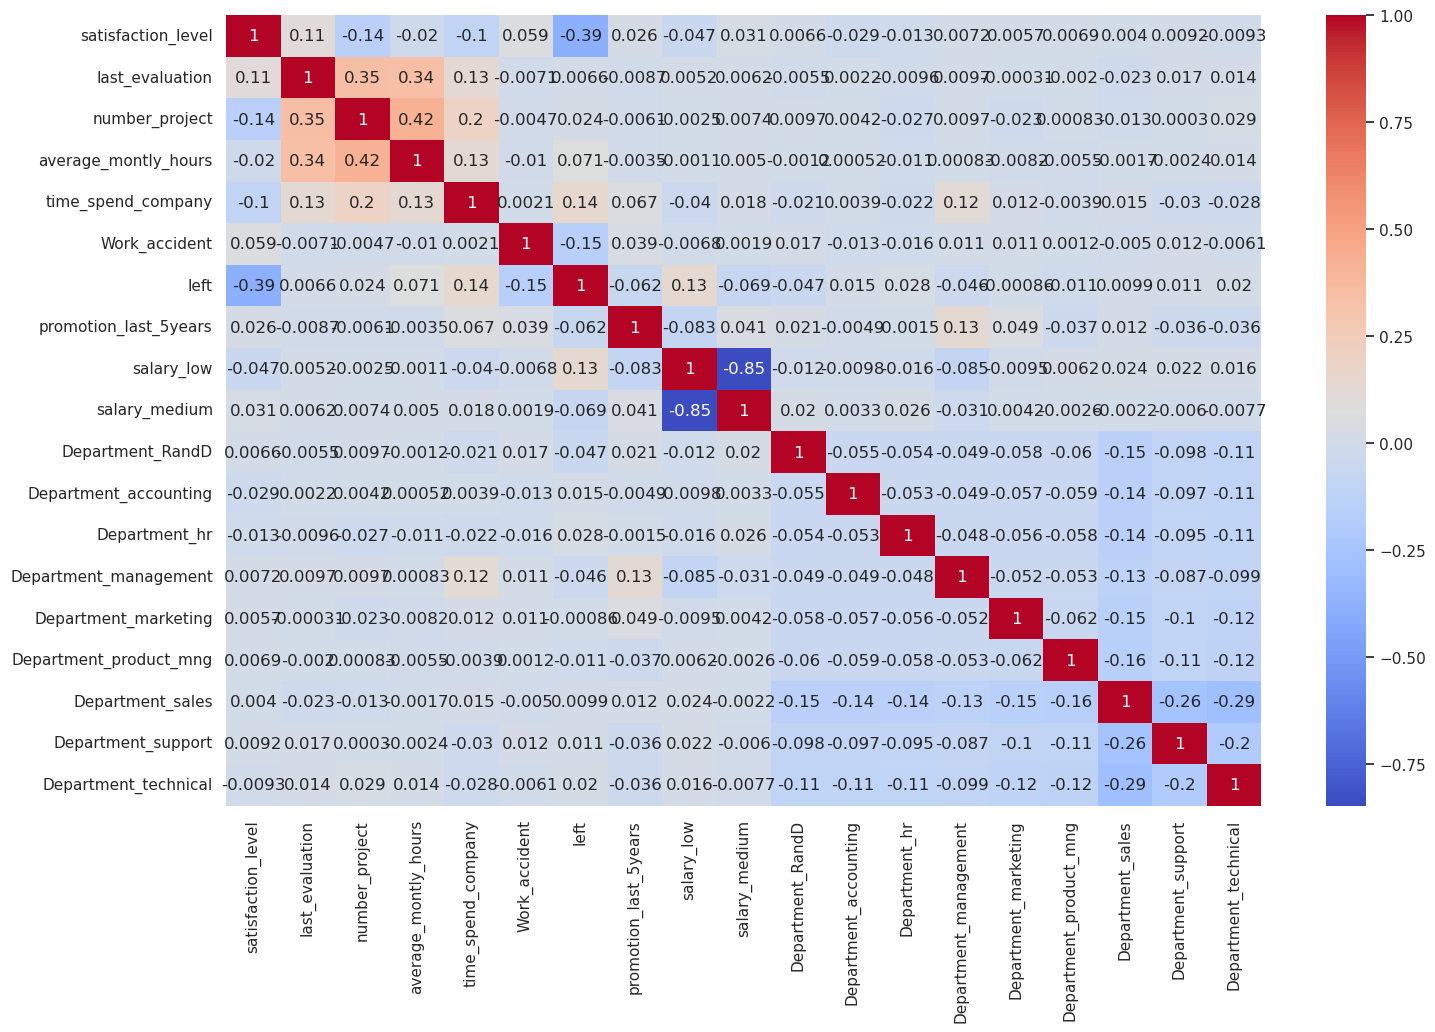

In [19]:
corr = hr[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary_low', 'salary_medium',
       'Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical']].corr()
 #finding the relationship btween feature variables and the target left
sns.set(rc={'figure.figsize':(16.7,10.27)})
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Data Segregation

In [20]:
from sklearn.model_selection import train_test_split
x=hr[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary_low', 'salary_medium',
       'Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical']]
y=hr['left']
x.shape #data segregation
    

(14999, 18)

In [21]:
y.shape

(14999,)

In [22]:
x_test,x_train,y_test,y_train= train_test_split(x,y,test_size=0.2) #use 80% to train the model and 20% of the data to test

# Model Training and Predicting

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"), LogisticRegression(max_iter=500) # Created a pipeline that first one-hot encodes the data and then fits a logistic regression model. Set max_iterations to avoid convergence warning
)
model.fit(x_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [24]:
model.predict(x_test) #using the model to predict

array([0, 0, 0, ..., 0, 0, 0])

# Model Evaluation

In [25]:
model.score(x_test,y_test) #checking for model performance

0.946828902408534

In [26]:
from sklearn.model_selection import cross_validate

model_score = cross_validate(model,x, y)
model_score #training and testing the model over multiple folds of the dataset.

{'fit_time': array([0.53047609, 0.56916213, 0.55724359, 0.54936695, 0.55546355]),
 'score_time': array([0.01275682, 0.01100636, 0.01050019, 0.01060343, 0.01029491]),
 'test_score': array([0.95966667, 0.951     , 0.94666667, 0.96166667, 0.96932311])}

## References
### for solving convergence warning and cross validation
https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline.html